# 목차
1. 분석의 방향
2. 데이터 Overview
3. 중복 제거
4. 결측치 제거
5. 데이터 형식 변환
6. 이상치 제거
7. 상관관계 및 그래프 분석
------------
# 1. 분석의 방향
+ 각 시간대별 수요의 경향은 어떻게 나타날 것인가?
  + 대부분의 사람들의 수요에 따라 시간대별 새로운 기본 요금을 책정할 수 있을 것이다.
+ 주행거리에 따라 팁 금액이 늘 것인가?
+ 톨게이트 비용이 발생한다면(장거리 혹은 특정 구간을 지나는 것으로 추정) 팁 금액이 늘 것인가?

-------------
# 2. 데이터 Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

taxi_df = pd.read_csv('trip.csv')
taxi_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [2]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [3]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [4]:
taxi_df.isna().agg(['sum','mean'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
sum,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000132,0.0,0.0


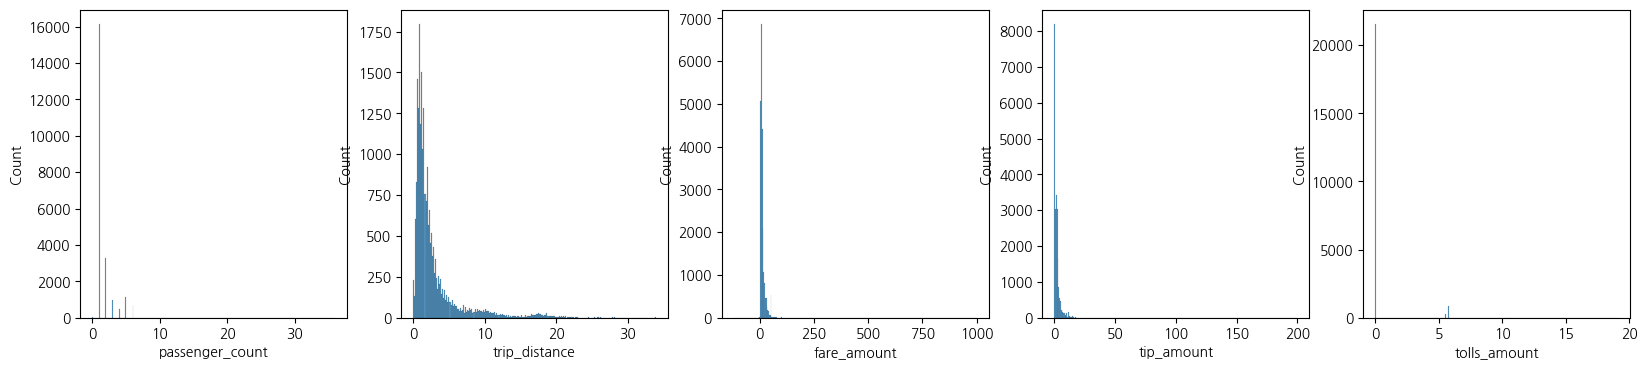

In [5]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(1,5,1)
ax2=fig.add_subplot(1,5,2)
ax3=fig.add_subplot(1,5,3)
ax4=fig.add_subplot(1,5,4)
ax5=fig.add_subplot(1,5,5)
sns.histplot(taxi_df, x='passenger_count', ax=ax1)
sns.histplot(taxi_df, x='trip_distance', ax=ax2)
sns.histplot(taxi_df, x='fare_amount', ax=ax3)
sns.histplot(taxi_df, x='tip_amount', ax=ax4)
sns.histplot(taxi_df, x='tolls_amount', ax=ax5)
plt.show()

In [6]:
sns.scatterplot(taxi_df, x='tolls_amount', ax=ax5)

<Axes: xlabel='tolls_amount', ylabel='Count'>

## 데이터 설명
데이터는 **22701행 9열**의 형태로 이루어져있으며, 각 열은 다음과 같습니다.
1. 고객명
2. 탑승 시간
3. 하차 시간
4. 결제 수단
5. 승객 수
6. 운행 거리
7. 주행 요금
8. 팁 금액
9. 톨게이트 요금
</br>

+ 결측치  
  '주행 요금'의 항목에서 결측치가 **3개**가 발견되었으며, 이는 **1% 미만**의 비율이기 때문에 데이터에 영향이 없을 것으로 판단됩니다.  

+ 데이터 형식  
  1~4의 값이 'object'이기에 값이 일관된 속성을 가지고 있지 않을 가능성이 있습니다.  
  그러므로, 데이터 형식을 맞추는 것과 동시에 발견되는 결측치에 대해 처리할 예정입니다.

  **목표 데이터 형식**  
  + 고객명 : 문자열
  + 탑승 시간 : 시간
  + 하차 시간 : 시간
  + 결제 수단 : 원-핫 인코딩(불린)
</br>

+ 이상치
  + 승객 수 : 0, 36
  + 운행 거리 : 0
  + 주행 요금 : -120, 999


-------------------
# 3. 중복 데이터 제거

In [7]:
taxi_df[taxi_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [8]:
taxi_df = taxi_df.drop_duplicates()

--------------------
# 4. 결측치 제거

In [9]:
taxi_df[taxi_df['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [10]:
taxi_df.drop(taxi_df[taxi_df['fare_amount'].isna()].index, inplace=True)

--------------
# 5. 데이터 형식 변환

In [11]:
# 고객 이름
taxi_df['passenger_name'] = taxi_df['passenger_name'].astype('string')
# 승하차 시간
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])
# 결제 수단
taxi_df['payment_method'] = taxi_df['payment_method'].astype('string')

In [12]:
# 탑승 시간대 피쳐 생성
taxi_df['pickup_hour']=taxi_df['tpep_dropoff_datetime'].dt.hour
# 주행 시간 피쳐 생성
taxi_df['trip_time']=taxi_df['tpep_dropoff_datetime']-taxi_df['tpep_pickup_datetime']
taxi_df['trip_time(min)'] = taxi_df['trip_time'].dt.total_seconds() / 60
# 탑승 시간, 하차 시간 drop
taxi_df=taxi_df.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1)

In [13]:
taxi_df['payment_method'].value_counts()
# 가짓수 이상 없음
taxi_df = pd.get_dummies(taxi_df, columns=['payment_method'])

In [14]:
# 총 요금 피쳐 생성
taxi_df['in_total'] = taxi_df['fare_amount']+taxi_df['tip_amount']+taxi_df['tolls_amount']

**고객 이름**에 대해서는 더 확인해봐야하지만,  
**승하차 시간**의 형식 변환에 오류가 발생하지 않은 것으로 보아 날짜 형식을 모두 갖춘 것으로 보입니다.

탑승 시간과 하차 시간을 이용하여 새로운 파생 변수를 만들어 분석에 이용하고자, '**주행 시간**'이라는 새로운 피쳐를 생성하였습니다.  
또한, 주로 고객이 이용하는 시간대를 확인하기 위하여 '**탑승 시간대**'라는 새로운 피쳐를 생성하였습니다.

현재 분석에 필요한 데이터를 '**탑승 시간**','**하차 시간**'을 통해 얻어냈으므로 해당 열을 제거하였습니다.

**결제 수단**의 경우,
1. 현금
2. 신용 카드
3. 체크 카드

위와 같은 경우의 수가 존재했으며, 이를 데이터화 시키기 위해서 원-핫 인코딩을 진행하였습니다.

**총 요금** 피쳐를 생성하여 **주행요금 + 팁 금액 + 톨게이트 요금**을 나타낼 수 있게 하였습니다.

-----------
# 6. 이상치 제거 및 수정
### 고객명

In [15]:
taxi_df['passenger_name'].sort_values()
# A-Z로 시작하는 이름들이 분포, 숫자나 특수 기호로 시작하는 이름은 없음

21359         Aaron Allen
6263        Aaron Andrews
14517     Aaron Armstrong
9075        Aaron Brennan
16500      Aaron Campbell
               ...       
14725    Zachary Williams
19489       Zachary Woods
828         Zachary Young
18063          Zoe Dorsey
5700           Zoe Larson
Name: passenger_name, Length: 22696, dtype: string

In [16]:
taxi_df['passenger_name'].apply(len).value_counts().sort_index()
# 이름의 길이가 7~28 까지 존재

passenger_name
7       16
8      128
9      531
10    1549
11    2881
12    3793
13    4207
14    3514
15    2469
16    1727
17     933
18     465
19     218
20     119
21      60
22      40
23      19
24      12
25      13
27       1
28       1
Name: count, dtype: int64

In [17]:
taxi_df[(taxi_df['passenger_name'].apply(len) <= 7)|(taxi_df['passenger_name'].apply(len) >=24)]['passenger_name']
# 이름에 각종 접두사, 접미사가 붙은 것을 확인

305         Mr. Reginald Phillips PhD
490          Mr. Alexander Johnson MD
1067                          Mary Yu
1549        Mrs. Theresa Campbell DDS
1941         Dr. Michael Williams DDS
2781        Mr. Christian Johnson III
3400                          Pam Lee
3818                          Jo Vang
4070                          Amy Roy
4096         Mrs. Kendra Griffith DDS
4158                          Mark Li
4831     Dr. Nicholas Christensen DVM
5858                          Lisa Le
6225        Mrs. Elizabeth Larsen DVM
7926         Dr. Christina Hughes DDS
8186        Mr. Kenneth Wilkerson Jr.
8703                          Lisa Wu
8791        Dr. Jennifer Thompson DDS
8799         Ms. Jennifer Bennett DVM
9024         Dr. Brittany Gonzalez MD
9902                          Kurt Le
10564                         Anna Le
10897       Mrs. Victoria Swanson DVM
11087        Mrs. Alexandra Whitehead
11563       Mr. Christopher Hughes II
12279       Mrs. Jennifer Garrett PhD
12433     Mr

In [18]:
taxi_df[taxi_df['passenger_name'].str.contains(r'[^a-zA-Z ]',regex=True)]
# 온점(.)을 기준으로 접두사와 접미사가 존재하며, 세대를 나타내는 접미사도 발견

,passenger_name,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_hour,trip_time,trip_time(min),payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,in_total
43,Dr. Christy Velasquez,1,4.52,16.5,2.00,0.0,8,0 days 00:16:21,16.350000,True,False,False,18.50
90,Mr. Paul Owens,1,9.60,30.5,0.00,0.0,18,0 days 00:26:56,26.933333,True,False,False,30.50
100,Dr. Daniel Davidson,1,1.42,7.0,0.00,0.0,23,0 days 00:07:31,7.516667,True,False,False,7.00
155,Mrs. Cynthia Williams,1,2.80,20.5,3.20,0.0,11,0 days 00:33:43,33.716667,True,False,False,23.70
167,Mrs. Sarah Burke MD,1,0.84,6.5,0.00,0.0,19,0 days 00:07:49,7.816667,True,False,False,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22295,Mr. Brian Moran,1,6.20,22.5,5.80,0.0,10,0 days 00:23:00,23.000000,False,True,False,28.30
22306,Mrs. Cathy Sanchez,1,1.11,8.5,1.96,0.0,2,0 days 00:10:41,10.683333,True,False,False,10.46
22457,Mr. Christian Campbell IV,3,4.24,15.5,3.36,0.0,20,0 days 00:15:19,15.316667,False,True,False,18.86
22502,Mr. Brian Edwards,1,2.43,12.0,1.33,0.0,20,0 days 00:15:50,15.833333,False,False,True,13.33


--------------------------------
### 주행 시간

In [19]:
taxi_df['trip_time(min)'].value_counts().sort_index()

trip_time(min)
-16.983333       1
 0.000000       26
 0.016667        3
 0.033333       11
 0.050000       18
                ..
 1438.550000     1
 1438.650000     1
 1438.850000     1
 1439.150000     1
 1439.550000     1
Name: count, Length: 3025, dtype: int64

In [20]:
# 주행 시간이 30초 이하의 수 161
len(taxi_df[taxi_df['trip_time(min)'] <= 0.5])

161

In [21]:
taxi_df[taxi_df['trip_time(min)'] >= 60*6][['trip_time(min)','fare_amount']].sort_values('trip_time(min)')

,trip_time(min),fare_amount
13221,689.883333,36.0
11887,736.050000,50.5
8197,1298.883333,13.5
7171,1386.800000,6.5
17396,1391.733333,9.5
13149,1392.050000,10.0
4602,1394.883333,10.0
12946,1395.683333,-120.0
1357,1399.400000,15.0
5480,1399.983333,5.5


In [22]:
# 주행 시간이 6시간 이상인 수 44
len(taxi_df[taxi_df['trip_time(min)'] >= 60*6])

44

In [23]:
# 주행 시간이 30초 이하 혹은 6시간 이상인 운행의 수 205
outlier_taxi = taxi_df[(taxi_df['trip_time(min)'] <= 0.5)|(taxi_df['trip_time(min)'] >= 60*6)]
outlier_taxi.head()

,passenger_name,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_hour,trip_time,trip_time(min),payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,in_total
129,Linda Kaufman,1,0.00,20.0,0.0,0.0,8,0 days 00:00:07,0.116667,False,False,True,20.0
248,Erik Perez,1,0.00,2.5,0.0,0.0,20,0 days 00:00:10,0.166667,True,False,False,2.5
293,Deborah Sanford,1,0.00,2.5,0.0,0.0,19,0 days 00:00:26,0.433333,True,False,False,2.5
316,Tiffany Johnson,6,0.12,-2.5,0.0,0.0,2,0 days 00:00:29,0.483333,True,False,False,-2.5
321,Ryan Hughes,1,0.00,2.5,0.0,0.0,4,0 days 00:00:09,0.150000,True,False,False,2.5


In [24]:
# 1% 미만의 데이터 제거
taxi_df=taxi_df.drop(outlier_taxi.index)

---------------------
### 승객 수

In [25]:
taxi_df['passenger_count'].value_counts(normalize=True).sort_index()*100
# 0, 36 은 이상이 있는 값
# 합쳐도 1%가 안 되기 때문에 drop

passenger_count
0      0.142279
1     70.961718
2     14.592504
3      4.197234
4      1.991908
5      5.064248
6      3.045663
36     0.004446
Name: proportion, dtype: float64

In [26]:
# 0이거나 36명인 행
passenger_outlier = taxi_df[(taxi_df['passenger_count'] == 0)|(taxi_df['passenger_count']==36)]
taxi_df=taxi_df.drop(passenger_outlier.index,axis=0)
taxi_df['passenger_count'].value_counts().sort_index()

passenger_count
1    15960
2     3282
3      944
4      448
5     1139
6      685
Name: count, dtype: int64

--------------------
### 운행 거리

In [27]:
taxi_df['trip_distance'].value_counts().sort_index()
# 37개의 0 발견
# 0.64%의 비율 drop

trip_distance
0.00     37
0.01      1
0.02      2
0.03      2
0.04      3
         ..
30.83     1
31.95     1
32.72     1
33.92     1
33.96     1
Name: count, Length: 1542, dtype: int64

In [28]:
'''
# 0을 제외한 분포 그래프
sns.barplot(x= taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts().index, y = taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].value_counts())
# 오른쪽 꼬리가 긴 형태이므로 평균으로 할 시 결과가 왜곡될 수 있음. 결측치를 중앙값으로 대체
distance_outlier=taxi_df[taxi_df['trip_distance']==0].index # 향후 값의 fare 피쳐와의 상관관계를 따져보기 위하여 인덱스 기억
taxi_df.loc[distance_outlier,'trip_distance']=taxi_df[taxi_df['trip_distance']!=0]['trip_distance'].median()
'''
pass

In [29]:
distance_outlier = taxi_df[taxi_df['trip_distance']==0]
taxi_df=taxi_df.drop(distance_outlier.index,axis=0)
taxi_df['trip_distance'].value_counts().sort_index()

trip_distance
0.01     1
0.02     2
0.03     2
0.04     3
0.05     1
        ..
30.83    1
31.95    1
32.72    1
33.92    1
33.96    1
Name: count, Length: 1541, dtype: int64

--------------------
### 주행 요금

In [30]:
taxi_df['fare_amount'].value_counts().sort_index()
# 음수의 요금 발견
# 999.99 값의 요금 발견

fare_amount
-4.50      2
-4.00      2
-3.50      3
-3.00      2
-2.50      1
          ..
 140.00    1
 150.00    1
 152.00    1
 200.01    1
 999.99    1
Name: count, Length: 172, dtype: int64

In [31]:
print(len(taxi_df[taxi_df['fare_amount'] <= 0]))
print(len(taxi_df[taxi_df['fare_amount'] >= 500]))
# 14개의 이상치 drop 

13
1


In [32]:
fare_outlier = taxi_df[(taxi_df['fare_amount'] <= 0)|(taxi_df['fare_amount'] >= 500)]
taxi_df=taxi_df.drop(fare_outlier.index,axis=0)
taxi_df['fare_amount'].value_counts().sort_index()

fare_amount
0.01        1
2.50       11
3.00       89
3.50      293
4.00      548
         ... 
131.00      1
140.00      1
150.00      1
152.00      1
200.01      1
Name: count, Length: 165, dtype: int64

--------------
# 팁

In [33]:
taxi_df['tip_amount'].value_counts().sort_index()
# 팁은 얼마를 주든 자유, 결측치만 없으면

tip_amount
0.00     7873
0.01        8
0.02        4
0.03        1
0.04        1
         ... 
25.20       1
28.00       1
42.29       1
51.64       1
55.50       1
Name: count, Length: 727, dtype: int64

In [34]:
taxi_df['tip_amount'].isna().sum()
# 결측치 없음

np.int64(0)

-----------------------
# 톨비

In [35]:
taxi_df['tolls_amount'].value_counts().sort_index()

tolls_amount
0.00     21256
2.16         1
2.54         6
2.64        10
2.70         1
4.32         1
5.16         1
5.44         1
5.45         1
5.49         1
5.54       234
5.76       834
6.00         1
6.32         1
8.00         1
8.16         1
8.40         1
8.50         2
10.50       21
11.52        2
12.50       10
13.00        1
15.00        1
15.50        2
15.58        1
16.00        2
16.20        1
16.26        3
16.50        2
16.62        1
17.28        1
17.50        1
18.00        1
18.26        1
18.28        1
19.10        1
Name: count, dtype: int64

In [36]:
taxi_df['tolls_amount'].isna().sum()

np.int64(0)

---------------
## 요약

+ 고객명  
  모든 이름은 대문자 알파벳으로 시작하고 길이가 7~28 까지 존재하며, 다음과 같은 문제가 있음을 발견하였습니다.
  1. 접두사 ['Mr.','Ms.','Mrs.','Dr.']
  2. 접미사 ['Jr.','Sr.','I','II','III','IV','V','VI']
 
  데이터 관리를 위해서는 이와 같은 문제를 해결해야 하는 것이 맞지만, 이번 분석에서 **고객 이름**은 결과에 영향을 끼치지 않으므로 제거하지 않았습니다.
+ 주행시간  
  주행 시간이 1분 이하인 자료는 잘못 표기된 자료이거나, 데이터의 상관관계를 충분히 표현하지 못하는 값으로 판단하였습니다.  
  또한 6시간 이상의 값은 주행 요금을 충분히 설명하지 못하는 값이라고 판단하여 제거하였습니다.

  주행 시간이 1분 이하 값의 수는 161행이며, 6시간 이상 값의 수는 44행입니다.  
  총 205행이 삭제 대상이며, 이는 전체 데이터의 1% 미만이기에 큰 영향이 없다고 판단하였습니다.
+ 승객 수  
  승객의 수가 0이거나 36명인 데이터는 기본적인 상식을 바탕으로도 불가능한 데이터이므로 제거하였습니다.  
제거한 데이터의 비율은 1% 미만입니다.
+ 운행 거리  
  **주행 거리**에서는 0 miles 의 값이 37개가 존재했으며, 이는 잘못 기입했거나 0.01 미만의 데이터가 입력된 것이라고 판단하여 삭제하였습니다.
+ 주행 요금  
  **요금** 속성에서는 0 이하의 값이 13개, 500 이상의 값이 1개 존재하여 삭제하였습니다.
+ 팁 금액, 톨게이트 비용  
  팁과 톨게이트 비용은 모두 상황에 따라 다르므로 이상치가 없다고 판단하였습니다.

#### **총 제거 행** : 294행
#### **제거된 비율** : 약 1.3%
#### **현재 데이터 행의 개수** : 22407행

In [37]:
taxi_df

,passenger_name,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,pickup_hour,trip_time,trip_time(min),payment_method_Cash,payment_method_Credit Card,payment_method_Debit Card,in_total
0,Pamela Duffy,6,3.34,13.0,2.76,0.00,9,0 days 00:14:04,14.066667,False,False,True,15.76
1,Michelle Foster,1,1.80,16.0,4.00,0.00,15,0 days 00:26:30,26.500000,False,False,True,20.00
2,Tina Combs,1,1.00,6.5,1.45,0.00,7,0 days 00:07:12,7.200000,False,False,True,7.95
3,Anthony Ray,1,3.70,20.5,6.39,0.00,13,0 days 00:30:15,30.250000,True,False,False,26.89
4,Brianna Johnson,1,4.37,16.5,0.00,0.00,23,0 days 00:16:43,16.716667,False,False,True,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,3,0.61,4.0,0.00,0.00,17,0 days 00:03:16,3.266667,True,False,False,4.00
22697,Monique Williams,1,16.71,52.0,14.64,5.76,17,0 days 00:40:48,40.800000,True,False,False,72.40
22698,Drew Graves,1,0.42,4.5,0.00,0.00,14,0 days 00:04:08,4.133333,False,False,True,4.50
22699,Jonathan Copeland,1,2.36,10.5,1.70,0.00,13,0 days 00:11:56,11.933333,False,False,True,12.20


------------------
# 7. 상관관계 및 그래프 분석

In [38]:
taxi_df = taxi_df.rename({'passenger_name':'고객명','payment_method':'결제수단','passenger_count':'고객 수','trip_distance':'주행거리','fare_amount':'주행요금','tip_amount':'팁','tolls_amount':'톨비','pickup_hour':'탑승시간대','trip_time(min)':'주행시간(분)','in_total':'총요금','payment_method_Cash':'현금','payment_method_Credit Card':'신용카드','payment_method_Debit Card':'체크카드'},axis=1)
taxi_df = taxi_df[['총요금','팁','톨비','주행요금','주행거리','탑승시간대','주행시간(분)','고객 수','현금','신용카드','체크카드','고객명']]


### 문제점

<Axes: xlabel='주행거리', ylabel='주행요금'>

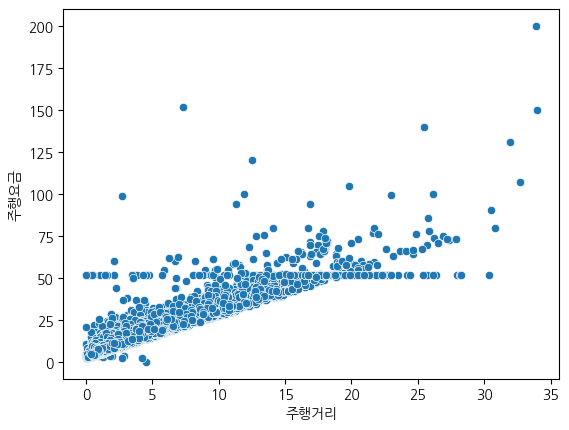

In [42]:
# '주행 거리'와 '요금'은 거의 선형관계에 있다.
# '주행 거리'가 적어도 '요금'은 클 가능성 있음(톨비, 교통상황 등). 그러나 '주행 거리'가 길어짊에도 '요금'이 적은 것은 문제가 있다.
sns.scatterplot(taxi_df[['주행거리','주행요금']],x='주행거리',y='주행요금')

In [46]:
taxi_df[(taxi_df['주행거리']>4)&(taxi_df['주행요금'] <3)]
# 2개의 이상치 발견

,총요금,팁,톨비,주행요금,주행거리,탑승시간대,주행시간(분),고객 수,현금,신용카드,체크카드,고객명


In [47]:
taxi_df=taxi_df.drop(taxi_df[(taxi_df['주행거리']>4)&(taxi_df['주행요금'] <3)].index)

-------------------
### 상관관계

<Axes: >

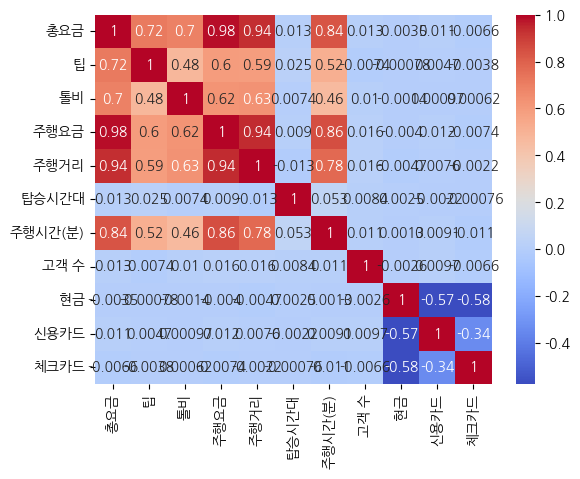

In [48]:
sns.heatmap(taxi_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

----------
### 그래프

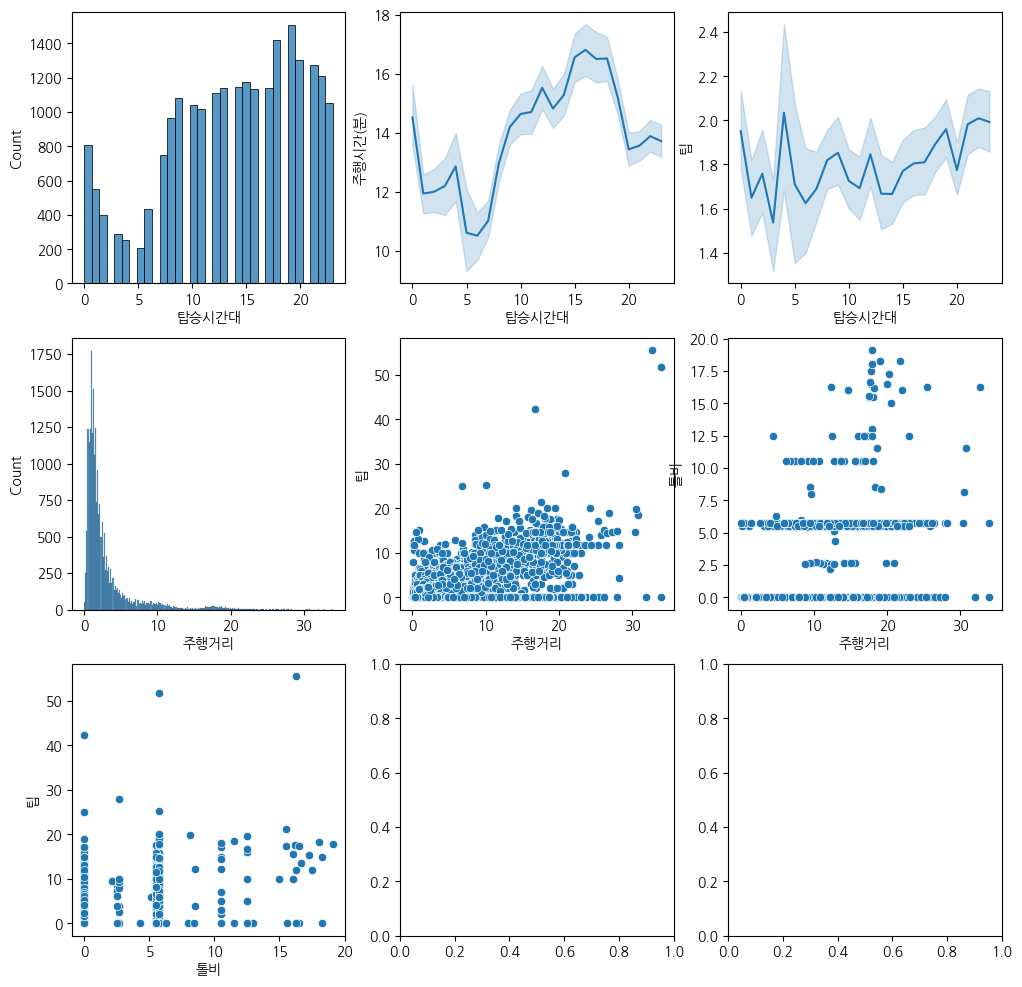

In [62]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(3,3,1)
ax2=fig.add_subplot(3,3,2)
ax3=fig.add_subplot(3,3,3)
ax4=fig.add_subplot(3,3,4)
ax5=fig.add_subplot(3,3,5)
ax6=fig.add_subplot(3,3,6)
ax7=fig.add_subplot(3,3,7)
ax8=fig.add_subplot(3,3,8)
ax9=fig.add_subplot(3,3,9)
sns.histplot(taxi_df, x='탑승시간대', ax=ax1)
sns.lineplot(taxi_df, x='탑승시간대',y='주행시간(분)', ax=ax2)
sns.lineplot(taxi_df, x='탑승시간대',y='팁', ax=ax3)
sns.histplot(taxi_df, x='주행거리', ax=ax4)
sns.scatterplot(taxi_df, x='주행거리',y='팁', ax=ax5)
sns.scatterplot(taxi_df, x='주행거리',y='톨비', ax=ax6)
sns.scatterplot(taxi_df, x='톨비',y='팁', ax=ax7)
plt.show()